In [26]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [27]:
df = pd.read_csv('C:/Users/jayan/Desktop/car_price_predictor/data.csv')
df.head()

,Car_Name,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Kms_Driven     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Seller_Type    301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [29]:
df.shape

(301, 9)

In [30]:
# dependant feature is SP. We must find it
# categorigal features are  fuel type, seller type ,transmission and owner

In [31]:
print(df['Seller_Type'].unique())

['Dealer' 'Individual']


In [32]:
print(df['Fuel_Type'].unique())

['Petrol' 'Diesel' 'CNG']


In [33]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [34]:
print(df['Owner'].unique())

[0 1 3]


In [35]:
# find missing values
df.isnull().sum()

Car_Name         0
Year             0
Selling_Price    0
Present_Price    0
Kms_Driven       0
Fuel_Type        0
Seller_Type      0
Transmission     0
Owner            0
dtype: int64

we have no null/missing values

In [36]:
df.describe()

,Year,Selling_Price,Present_Price,Kms_Driven,Owner
count,301.000000,301.000000,301.000000,301.000000,301.000000
mean,2013.627907,4.661296,7.628472,36947.205980,0.043189
std,2.891554,5.082812,8.644115,38886.883882,0.247915
min,2003.000000,0.100000,0.320000,500.000000,0.000000
25%,2012.000000,0.900000,1.200000,15000.000000,0.000000
50%,2014.000000,3.600000,6.400000,32000.000000,0.000000
75%,2016.000000,6.000000,9.900000,48767.000000,0.000000
max,2018.000000,35.000000,92.600000,500000.000000,3.000000


In [37]:
print(df['Year'].unique())

[2014 2013 2017 2011 2018 2015 2016 2009 2010 2012 2003 2008 2006 2005
 2004 2007]


In [38]:
df.columns

Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner'],
      dtype='object')

In [39]:
new_dataset = df[[ 'Year', 'Selling_Price', 'Present_Price', 'Kms_Driven',
       'Fuel_Type', 'Seller_Type', 'Transmission', 'Owner']]
new_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [40]:
new_dataset['Current_Year'] = 2021
new_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021


In [41]:
new_dataset['Age'] = new_dataset['Current_Year'] - new_dataset['Year']
new_dataset.head()

,Year,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Current_Year,Age
0,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0,2021,7
1,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0,2021,8
2,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0,2021,4
3,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0,2021,10
4,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0,2021,7


In [42]:
# since we found the car's age, we need not require year and current year columns
new_dataset.drop(['Year', "Current_Year"],axis = 1, inplace=True)
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Fuel_Type,Seller_Type,Transmission,Owner,Age
0,3.35,5.59,27000,Petrol,Dealer,Manual,0,7
1,4.75,9.54,43000,Diesel,Dealer,Manual,0,8
2,7.25,9.85,6900,Petrol,Dealer,Manual,0,4
3,2.85,4.15,5200,Petrol,Dealer,Manual,0,10
4,4.60,6.87,42450,Diesel,Dealer,Manual,0,7


In [43]:
# we use dummy trap inorder to categorize our variables as 1 & 0

    # suppose if the fuel type is CNG (1) then petrol = diesel = 0...
    #     which means if petrol and diesel is 0 then it is obvious that the fuel type is CNG only

new_dataset = pd.get_dummies(new_dataset, drop_first = True)
new_dataset.head()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,3.35,5.59,27000,0,7,0,1,0,1
1,4.75,9.54,43000,0,8,1,0,0,1
2,7.25,9.85,6900,0,4,0,1,0,1
3,2.85,4.15,5200,0,10,0,1,0,1
4,4.60,6.87,42450,0,7,1,0,0,1


In [44]:
new_dataset.corr()

,Selling_Price,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
Selling_Price,1.000000,0.878983,0.029187,-0.088344,-0.236141,0.552339,-0.540571,-0.550724,-0.367128
Present_Price,0.878983,1.000000,0.203647,0.008057,0.047584,0.473306,-0.465244,-0.512030,-0.348715
Kms_Driven,0.029187,0.203647,1.000000,0.089216,0.524342,0.172515,-0.172874,-0.101419,-0.162510
Owner,-0.088344,0.008057,0.089216,1.000000,0.182104,-0.053469,0.055687,0.124269,-0.050316
Age,-0.236141,0.047584,0.524342,0.182104,1.000000,-0.064315,0.059959,0.039896,-0.000394
Fuel_Type_Diesel,0.552339,0.473306,0.172515,-0.053469,-0.064315,1.000000,-0.979648,-0.350467,-0.098643
Fuel_Type_Petrol,-0.540571,-0.465244,-0.172874,0.055687,0.059959,-0.979648,1.000000,0.358321,0.091013
Seller_Type_Individual,-0.550724,-0.512030,-0.101419,0.124269,0.039896,-0.350467,0.358321,1.000000,0.063240
Transmission_Manual,-0.367128,-0.348715,-0.162510,-0.050316,-0.000394,-0.098643,0.091013,0.063240,1.000000


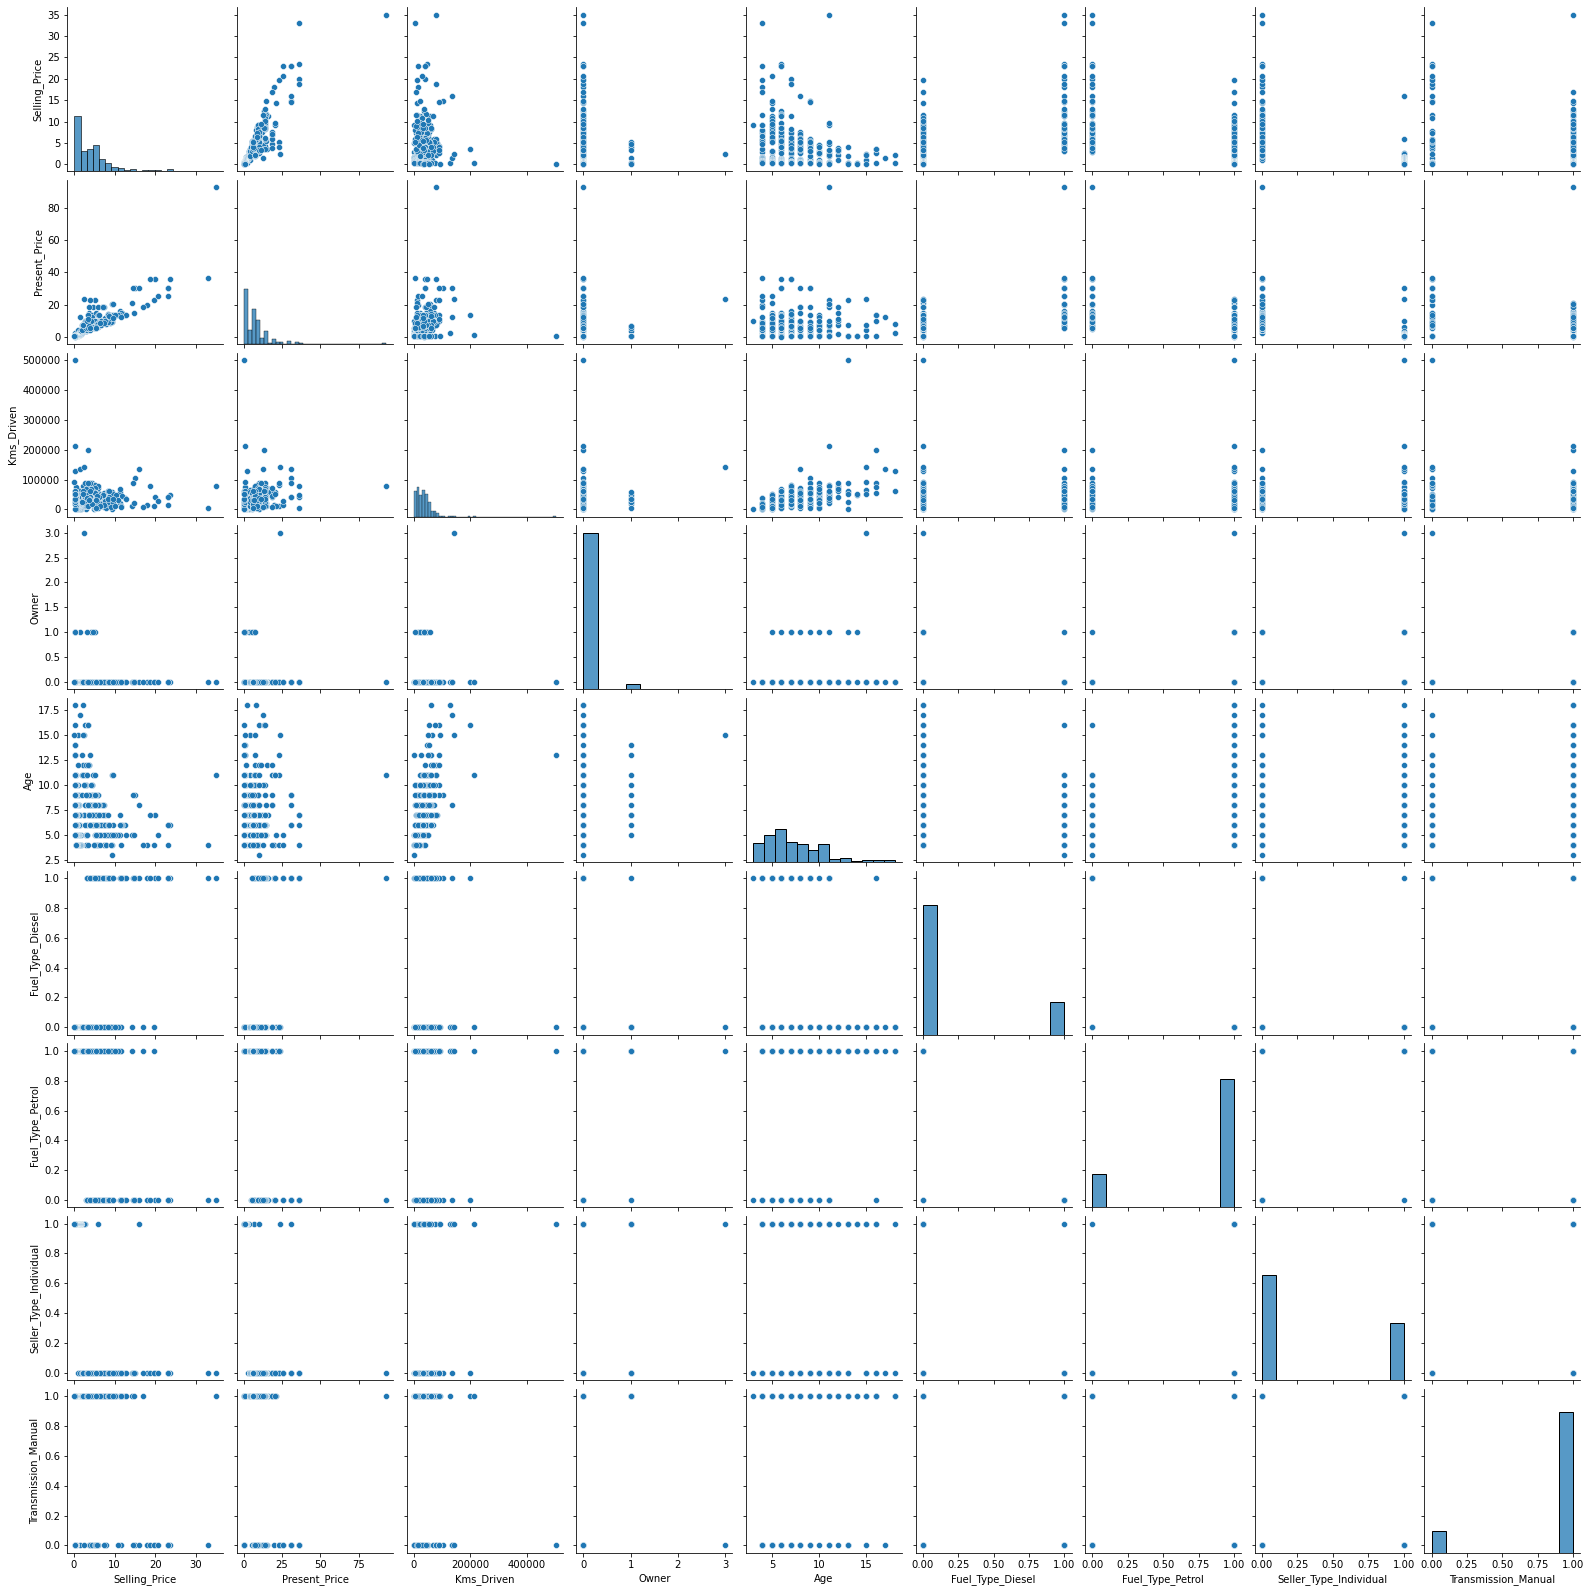

In [45]:
sns.pairplot(new_dataset)

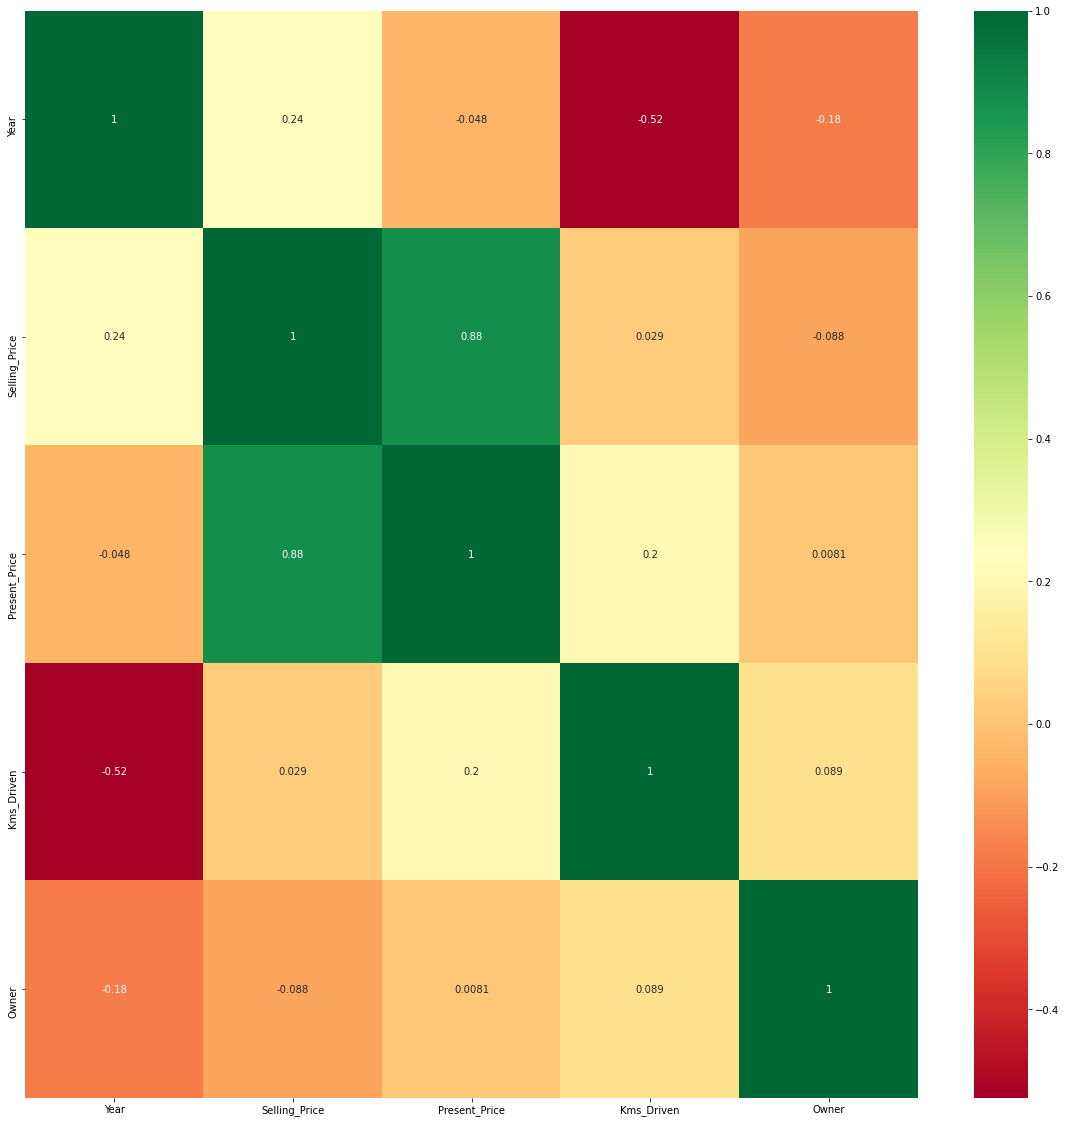

In [46]:
corrn = df.corr()
top_corrn_features = corrn.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corrn_features].corr(),annot=True,cmap="RdYlGn")

In [47]:
# dependant and independant features
x = new_dataset.iloc[:,1:]
x.head()

,Present_Price,Kms_Driven,Owner,Age,Fuel_Type_Diesel,Fuel_Type_Petrol,Seller_Type_Individual,Transmission_Manual
0,5.59,27000,0,7,0,1,0,1
1,9.54,43000,0,8,1,0,0,1
2,9.85,6900,0,4,0,1,0,1
3,4.15,5200,0,10,0,1,0,1
4,6.87,42450,0,7,1,0,0,1


In [48]:
y=new_dataset.iloc[:,0]

In [49]:
y.head()

0    3.35
1    4.75
2    7.25
3    2.85
4    4.60
Name: Selling_Price, dtype: float64

In [50]:
# Train test split
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2)

In [51]:
x_test.shape

(61, 8)

In [52]:
x_train.shape

(240, 8)

In [53]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
  
regr.fit(x_train, y_train)

LinearRegression()

In [54]:
print("train accuracy")
display(regr.score(x_train,y_train))

train accuracy


0.8972277116325245

In [55]:
print("test accuracy")
display(regr.score(x_test,y_test))

test accuracy


0.45317313302635165

In [56]:
prediction=regr.predict(x_test)
prediction

array([  0.59986078,  18.85324533,   7.25868183,   2.24966432,
         7.34058232,  -7.2645332 ,   0.34262399,   2.28675794,
        -1.15529886,   2.64759109,   1.71109464,   7.69536145,
         5.90492326,   4.62937471,  -5.89090795,   4.31017453,
        -0.41885586,   2.18534434,  -2.2583862 ,   1.10609231,
         1.37586519,   5.69598946,  -4.39435383,   7.02354251,
         0.33310858,   4.92101727,   1.68203074,   6.19773714,
         6.08071229,   2.07788906,   7.8995945 ,   5.50261442,
         6.29420269,   3.73072027,   5.08882331,   3.4574468 ,
         8.49755747,   7.6489926 ,   7.75908969,   1.3795535 ,
         8.19962072,   2.63496024,   1.36808357,   3.02509363,
       -16.69423119,   5.9060632 ,   3.92438316,   0.90787746,
         0.60157742,  -0.17171857,   5.20928606,  -0.74552491,
         1.92608373,   4.51362911,   6.11196824,   1.08836827,
         5.653134  ,   8.73009021,   0.52086432,   9.44065684,
         1.51181641])

C:\Users\jayan\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Selling_Price', ylabel='Density'>

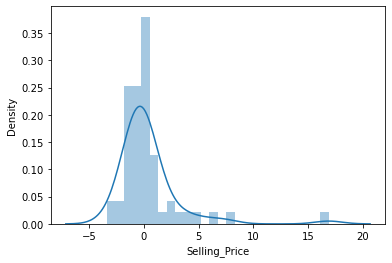

In [57]:
sns.distplot(y_test-prediction)

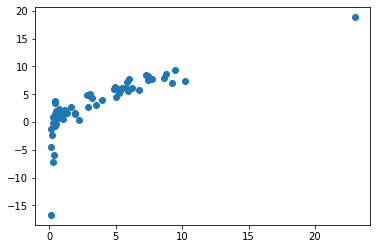

In [58]:
plt.scatter(y_test,prediction)

In [59]:
from sklearn import metrics

In [60]:
print('MAE:', metrics.mean_absolute_error(y_test, prediction))
print('MSE:', metrics.mean_squared_error(y_test, prediction))
print('RMSE:', np.sqrt(metrics.mean_squared_error(y_test, prediction)))

MAE: 1.515198870980077
MSE: 8.269918179230537
RMSE: 2.8757465429398565


In [61]:
import pickle
# open a file, where you ant to store the data
file = open('linear_regression.pkl', 'wb')

# dump information to that file
pickle.dump(regr, file)


In [63]:
from sklearn.metrics import r2_score
r2 = r2_score(x_test, y_pred)
print(r2)

NameError: name 'y_pred' is not defined